In [1]:
import pandas as pd
import glob
from scipy.stats import ttest_ind

In [8]:
resultDir = 'results'

In [9]:
problem = 'setcover' # choices=['setcover', 'cauctions', 'facilities', 'indset']
sampling_Strategies = ['uniform5', 'depthK2']
sampling_seeds = [1, 1]
metric_columns = ['acc@1','acc@3','acc@5','acc@10']


In [10]:
samplingStragety1 = sampling_Strategies[0]
samplingStragety2 = sampling_Strategies[1]
ss1 = sampling_seeds[0]
ss2 = sampling_seeds[1]

In [11]:
# 
targetfiles_strategy1 = glob.glob(f'{resultDir}/{problem}/{problem}_{samplingStragety1}_ss{ss1}_*')
targetfile1 = targetfiles_strategy1[-1]
target_df1 = pd.read_csv(targetfile1)
mean1 = target_df1[metric_columns].mean()
std1 = target_df1[metric_columns].std()

targetfiles_strategy2 = glob.glob(f'{resultDir}/{problem}/{problem}_{samplingStragety2}_ss{ss2}_*')
targetfile2 = targetfiles_strategy2[-1]
target_df2 = pd.read_csv(targetfile2)
mean2 = target_df2[metric_columns].mean()
std2 = target_df2[metric_columns].std()

t_statistics, p_values = ttest_ind(target_df1[metric_columns], target_df2[metric_columns], equal_var=False)

In [12]:
df = pd.DataFrame()
df['Problem'] = [problem]*4
df['Accuracy level'] = ['acc@1', 'acc@3', 'acc@5', 'acc@10']
df[samplingStragety1] = ["%5.4f ± %5.4f" % (m*100, s*100) for (m, s) in zip(mean1, std1)]
df[samplingStragety2] = ["%5.4f ± %5.4f" % (m*100, s*100) for (m, s) in zip(mean2, std2)]
df['T-Test t-statistic'] = ["%5.4f" % p for p in t_statistics]
df['T-Test p-value'] = ["%5.4f" % p for p in p_values]
df

,Problem,Accuracy level,uniform5,depthK2,T-Test t-statistic,T-Test p-value
0,setcover,acc@1,53.2500 ± 1.9614,53.7000 ± 1.1106,-0.6313,0.5378
1,setcover,acc@3,73.8000 ± 1.2737,73.9500 ± 1.3006,-0.2606,0.7974
2,setcover,acc@5,83.6000 ± 1.6125,83.6500 ± 1.5465,-0.0708,0.9444
3,setcover,acc@10,93.3000 ± 0.7888,93.0500 ± 0.5503,0.8220,0.4231


In [13]:
df.to_csv(f'{resultDir}/{problem}/{problem}_TTEST_{samplingStragety1}_vs_{samplingStragety2}.csv')

In [1]:
def a1():
    global x
    x = 1
    a2()

In [2]:
def a2():
    global x
    x += 1
    # y += 2

In [3]:
a1()

In [23]:
a2()

In [11]:
x = {2:3, 1:2}

In [18]:
y = {0:1, 2:4, 3:1}

In [19]:
x

{2: 3, 1: 2}

In [20]:
pd.Series(x)

2    3
1    2
dtype: int64

In [21]:
pd.Series(y)

0    1
2    4
3    1
dtype: int64

In [24]:
df = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df

,0,1
0,NaN,1.0
1,2.0,NaN
2,3.0,4.0
3,NaN,1.0


In [25]:
df.columns = ['accessTimes', 'sampleTimes']

In [26]:
df

,accessTimes,sampleTimes
0,NaN,1.0
1,2.0,NaN
2,3.0,4.0
3,NaN,1.0


In [12]:
pd.DataFrame.from_dict(x, orient='index')

,0
2,3
1,2


In [54]:
{k: sum(x.values())/v for k, v in x.items()}

{1: 3.0, 'a': 1.5}

In [37]:
x[0].loc[2,'sampleTimes'] = 1

In [38]:
df

,sampleTimes
2,1.0


In [39]:
import multiprocessing as mp

In [45]:
print(ns.abc)

Empty DataFrame
Columns: []
Index: []


In [46]:
ns.abc is ns.abc

False

In [20]:
depthTable.sum() / depthTable

,data2,data1
2,1.0,NaN
1,NaN,1.0


In [22]:
x = {1:2, 3:4}

In [30]:
sum(x.values()) / x.values()

TypeError: unsupported operand type(s) for /: 'int' and 'dict_values'

# Part 1 - Plotting

In [83]:
problem = "indset"
samplingStrategy = "uniform5" # choices: uniform5, depthK
SolStatsSummary_files = {
    'setcover': f'data/samples/setcover/500r_1000c_0.05d({samplingStrategy})/train/AllEpsSolStats.csv', 
    'cauctions': f'data/samples/cauctions/100_500({samplingStrategy})/train/AllEpsSolStats.csv',
    'facilities': f'data/samples/facilities/100_100_5({samplingStrategy})/train/AllEpsSolStats.csv',
    'indset': f'data/samples/indset/500_4({samplingStrategy})/train/AllEpsSolStats.csv'
}
SolStatsSummary_file = SolStatsSummary_files[problem]
df = pd.read_csv(SolStatsSummary_file)

In [84]:
df

,Unnamed: 0,episode,instance,visitedNNodes,maxDepth
0,0,0,data/instances/indset/train_500_4\instance_72.lp,55,7
1,0,1,data/instances/indset/train_500_4\instance_40.lp,34,6
2,0,6,data/instances/indset/train_500_4\instance_2.lp,28,6
3,0,5,data/instances/indset/train_500_4\instance_99.lp,27,6
4,0,8,data/instances/indset/train_500_4\instance_98.lp,368,11
...,...,...,...,...,...
93,0,97,data/instances/indset/train_500_4\instance_32.lp,636,17
94,0,95,data/instances/indset/train_500_4\instance_89.lp,1837,30
95,0,90,data/instances/indset/train_500_4\instance_97.lp,3169,25
96,0,93,data/instances/indset/train_500_4\instance_90.lp,2655,22


<AxesSubplot:>

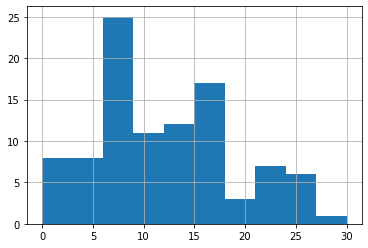

In [85]:
df['maxDepth'].hist()

<AxesSubplot:>

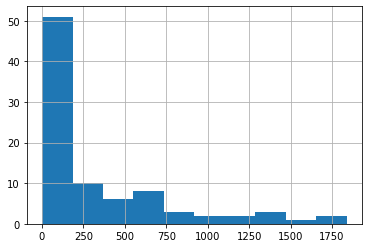

In [107]:
df['visitedNNodes'][df['visitedNNodes'] < df['visitedNNodes'].sort_values().iloc[round(0.9*len(df['visitedNNodes']))]].hist()

In [106]:
df['visitedNNodes'].sort_values().iloc[round(0.2*len(df['visitedNNodes']))]

19

In [88]:
len(df['visitedNNodes'])

98

In [89]:
import time

In [38]:
start = time.time()
df['visitedNNodes'].sort_values().iloc[round(0.2*len(df['visitedNNodes']))]
end = time.time()
print(end - start)

0.001999378204345703
